In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
import scipy
import matplotlib.cm as cm
import sklearn.metrics as sm
import scipy.stats as stats
import seaborn as sns; sns.set_theme()

In [3]:
df = pd.read_excel("Hotels Data.xlsx")
df.set_index("ID", inplace = True)
df.head()

,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
ID,,,,,,,,
1,Europe,139,5,350,8.3,1,25,Sarajevo
2,Europe,187,5,350,8.3,2,40,Sarajevo
3,Hills,255,5,10000,8.5,3,42,Sarajevo
4,Hills,141,5,10000,8.5,2,42,Sarajevo
5,Boutique,117,4,450,8.7,1,15,Sarajevo


### Descriptive statistics for Price(BAM)

In [4]:
df["Price(BAM)"].describe(). round(2)

count    120.00
mean     153.34
std       79.44
min       39.00
25%       99.50
50%      140.00
75%      180.00
max      474.00
Name: Price(BAM), dtype: float64

- count: total observations of variable Price(BAM) is 120
- mean: mean value of the variable Price(BAM) is 153,34 BAM
- std: average variation of individual values from average value of variable Price(BAM) is 79,44 BAM
- min: minimal value of variable Price(BAM) is 39,00 BAM
- 25%: 25% values of variable Price(BAM) are equal to 99,50 BAM or lower
- 50%(median): 50% values of variable Price(BAM) have the value of 140,00 BAM or lower/higher
- 75%: 75% values of variable Price(BAM) have the value of 180,00 BAM or lower
- max: maximum value of variable Price(BAM) is 474,00 BAM










#### Correlation

In [5]:
corr = df[["Price(BAM)", "Hotel star rating", "Distance", "Customer rating", "Rooms", "Squares"]].corr()
corr

,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares
Price(BAM),1.000000,0.486735,-0.098980,0.324418,0.438016,0.660703
Hotel star rating,0.486735,1.000000,-0.073850,0.499198,-0.022923,0.436063
Distance,-0.098980,-0.073850,1.000000,-0.344031,0.056606,0.054665
Customer rating,0.324418,0.499198,-0.344031,1.000000,-0.050520,0.275017
Rooms,0.438016,-0.022923,0.056606,-0.050520,1.000000,0.420093
Squares,0.660703,0.436063,0.054665,0.275017,0.420093,1.000000


[Text(0.5, 1.0, 'Correlation matrix')]

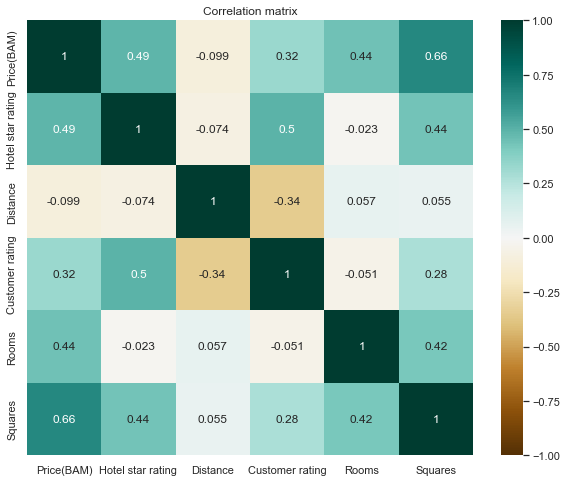

In [6]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = "BrBG")

ax.set(title = "Correlation matrix")

In [7]:
corr["Price(BAM)"]

Price(BAM)           1.000000
Hotel star rating    0.486735
Distance            -0.098980
Customer rating      0.324418
Rooms                0.438016
Squares              0.660703
Name: Price(BAM), dtype: float64

Medium positive correlation of variable Price(BAM) with variables:
- Hotel star rating, 
- Distance, 
- Customer rating, 
- Rooms and 
- Square

Increase in value of theese variables leeds to increase of value of Price(BAM)


Small negative correlation with the variable:
- Distance

Increase in value of this variable leeds to decrease of value of Price(BAM)

#### Skewness and Kurtosis

[Text(0.5, 1.0, 'Price(BAM) Distribution'), Text(0.5, 0, 'BAM')]

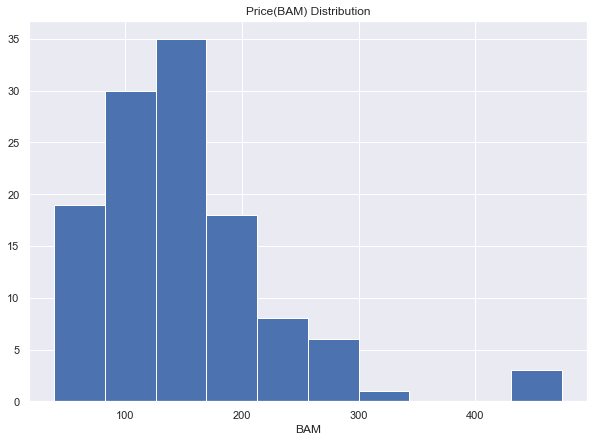

In [8]:
fig, ax = plt.subplots(figsize = (10, 7))

df["Price(BAM)"].hist()

ax.set(title = "Price(BAM) Distribution", xlabel = "BAM")

In [9]:
stats.skew(df["Price(BAM)"])

1.7525620170331295

In [10]:
stats.kurtosis(df["Price(BAM)"], fisher = False)

7.485316905335616

Positivly skewed distribution. Most observation are concentrated on lower values. Positive kurtosis. This indicates that the distribution is peaked. From the graphical representation we could conclude that it is not normal distribution.

#### Normality test

In [11]:
stats.kstest(df["Price(BAM)"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

P value is 0 which means that we reject null hypothesis and conclude that the variable Price(BAM) does not follow normal distribution. Because of that we will use non parametric tests

### Finding outliers

#### With boxplot

''

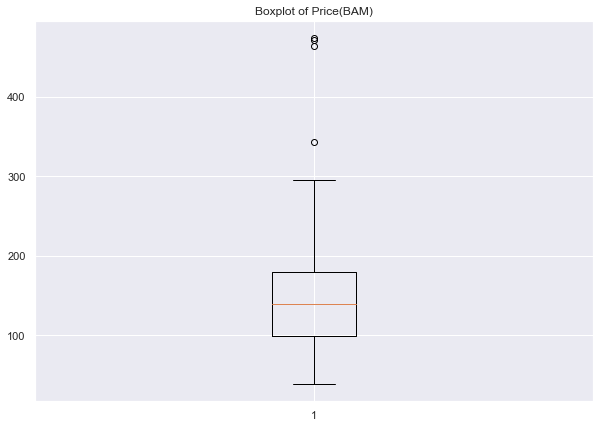

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))

plt.boxplot(df["Price(BAM)"], )


ax.set(title = "Boxplot of Price(BAM)")
;

In [13]:
df["Price(BAM)"].sort_values(ascending = False)

ID
64     474
79     472
98     464
96     343
48     296
      ... 
65      58
107     57
90      53
89      49
18      39
Name: Price(BAM), Length: 120, dtype: int64

From the boxplot we can see that we have 3 outliers with high values. Those are 474, 472 and 464 BAM

#### With z values

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(pd.DataFrame(df["Price(BAM)"]))
scaler = scaler.transform(pd.DataFrame(df["Price(BAM)"]))

results = pd.DataFrame(scaler)

In [15]:
results.sort_values(by = 0).head()

,0
17,-1.445304
88,-1.318902
89,-1.268341
106,-1.217780
64,-1.205140


There are no values lower then -3

In [16]:
results.sort_values(by = 0).tail()

,0
47,1.803233
95,2.397324
97,3.926791
78,4.027913
63,4.053193


There are three values above 3 which are outliers

### Statistical hypothesis tests

#### One sample t test

In [17]:
df.sort_values("Price(BAM)", ascending = False).head(1)

,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
ID,,,,,,,,
64,Hilton Belgrade,474,4,1400,9.4,3,55,Belgrade


In [18]:
bg = df[(df["City"] == "Belgrade") & (df["Hotel star rating"] == 4) & (df["Price(BAM)"] != 474)]

We have found that the most expensive stay is in the city of Belgrade in 4 star hotel. Let's say that they gathered the data for the Belgrade city and 4 star hotels and they are questioning if they should lower their price of stay. We ask a question here if the sample of other Belgrade 4 star hotels differs from the price of the Hilton Belgrade hotel (474 BAM) significantly.

In [19]:
bg.count()

Hotel name           15
Price(BAM)           15
Hotel star rating    15
Distance             15
Customer rating      15
Rooms                15
Squares              15
City                 15
dtype: int64

Since there are only 15 observation we will use Shapiro Wilk test of normality

In [20]:
stats.shapiro(bg["Price(BAM)"])

ShapiroResult(statistic=0.9312921166419983, pvalue=0.2852596938610077)

P value is 0,29 and at the level of signfificance of 0,05 we accept null hypothesis and conclude that it is normal distribution. Because of that we will use one sample t test

In [21]:
stats.ttest_1samp(bg["Price(BAM)"], popmean = 150)

Ttest_1sampResult(statistic=-1.5197541483192392, pvalue=0.15083112674337365)

P value of test is 0 and we reject null hypothesis and conclude that average price of 4 star hotels in Belgrade significantly differ from 474 BAM

#### Kruskal Wallis test

Let's say we want now to test if avaerage price of stay differs significantly between the cities. We have 4 cities in out dataframe so that's 4 samples. We need to test every sample for normality test. Since there are 30 observations per city we'll use Shapiro Wilk test

In [23]:
sa = df[df["City"] == "Sarajevo"]
bg = df[df["City"] == "Belgrade"]
zg = df[df["City"] == "Zagreb"]
lju = df[df["City"] == "Ljubljana"]

In [28]:
stats.shapiro(sa["Price(BAM)"])

ShapiroResult(statistic=0.9374462366104126, pvalue=0.07764968276023865)

In [29]:
stats.shapiro(bg["Price(BAM)"])

ShapiroResult(statistic=0.810200035572052, pvalue=0.00010115762415807694)

Data for city Belgrade is not normally distributed. Because of that we will use non-parametric test Kruskal Wallis

In [32]:
stats.kruskal(sa["Price(BAM)"], 
              bg["Price(BAM)"], 
              zg["Price(BAM)"], 
              lju["Price(BAM)"])

KruskalResult(statistic=3.4540965538957953, pvalue=0.3267646259024234)

P value for Kruskal Wallis is 0,33 and at significance level of 0.05 we accept null hypothesis and conclude that there is no statistically significant difference between cities in variable Price(BAM)